# Computational tools for data science - project

Laoading data and first exploratory analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix = pd.read_csv('data/netflix_titles.csv')
amazon = pd.read_csv('data/amazon_prime_titles.csv')
hulu = pd.read_csv('data/hulu_titles.csv')
disney = pd.read_csv('data/disney_plus_titles.csv')

main = pd.read_csv('data/TMDB_all_movies.csv')

In [3]:
main.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,suomi,"Tomi Salmela, Jaakko Talaskivi, Hannu Kivisalo...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,"suomi, English, svenska","Kati Outinen, Ulla Kuosmanen, Jaakko Talaskivi...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,English,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison...","Rodrigo García, Guillermo Navarro, Phil Parmet...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,English,"Christine Harnos, Lauren Robinson, Deirdre Kel...",Stephen Hopkins,Peter Levy,"Lewis Colick, Jere Cunningham","Lloyd Segan, Gene Levy, Marilyn Vance",Alan Silvestri,6.6,19268.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg


In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Remove TV shows (we only want movies)
def remove_tv_show(df):
    return df[df['type'] == 'Movie']

print('Before removing shows')
print(netflix.shape)
print(amazon.shape)
print(hulu.shape)
print(disney.shape)

netflix = remove_tv_show(netflix)
disney = remove_tv_show(disney)
hulu = remove_tv_show(hulu)
amazon = remove_tv_show(amazon)

#dimension of the dataset
print('After removing shows')
print(netflix.shape)
print(amazon.shape)
print(hulu.shape)
print(disney.shape)

Before removing shows
(8807, 12)
(9668, 12)
(3073, 12)
(1450, 12)
After removing shows
(6131, 12)
(7814, 12)
(1484, 12)
(1052, 12)


In [6]:
#add platform column to main dataset
def platform_column(main, platform, platform_name):
    for index, row in main.iterrows():
        if row['title'] in platform['title'].values: #cambiar dependiendo del nombre de la columna
            main.loc[index, platform_name] = 1
        else:
            main.loc[index, platform_name] = 0
    return main

In [ ]:
# main_netflix = platform_column(main, netflix, 'Netflix')
# main_net_ama = platform_column(main_netflix, amazon, 'Amazon')
# main_net_ama_hulu = platform_column(main_net_ama, hulu, 'Hulu')
# main_complete = platform_column(main_net_ama_hulu, disney, 'Disney')

Run from here!

In [4]:
# load dataset
main_complete = pd.read_csv('data/main_complete.csv')
main_complete.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,music_composer,imdb_rating,imdb_votes,poster_path,Netflix,Amazon,Hulu,Apple,HBO,sentiment
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,0.0,1.0,1.0,0.0,0.0,68.24
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,0.0,1.0,1.0,0.0,0.0,73.44
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,0.0,1.0,0.0,1.0,0.0,86.06
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,Alan Silvestri,6.6,19268.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg,0.0,1.0,0.0,0.0,0.0,79.34
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg,0.0,0.0,0.0,0.0,0.0,382.44


1009839


In [6]:
#count the number of movies in each platform
def count_movies(df, platform_name):
    return df[platform_name].sum()

In [7]:
netflix_count = count_movies(main_complete, 'Netflix')
print(netflix_count)
amazon_count = count_movies(main_complete, 'Amazon')
print(amazon_count)
hulu_count = count_movies(main_complete, 'Hulu')
print(hulu_count)
disney_count = count_movies(main_complete, 'Disney')
print(disney_count)

36998.0
108669.0
15330.0


KeyError: 'Disney'

In [10]:
#count the number of movies in more than one platform (take in consideration two, three and four platforms)
count = 0
for index, row in main_complete.iterrows():
    if row['Netflix'] + row['Amazon'] + row['Hulu'] + row['Disney'] > 1:
        count += 1
print(count)

3103


In [11]:
#identify which movies are in more than one platform
def more_than_one_platform(df):
    return df[(df['Netflix'] + df['Amazon'] + df['Hulu'] + df['Disney']) > 1]

in_platforms = more_than_one_platform(main_complete)

In [12]:
in_platforms

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path,Netflix,Amazon,Hulu,Disney
45,79,Hero,7.500,2226.0,Released,2002-07-22,177394432.0,99.0,31000000.0,tt0299977,...,"Zhang Yimou, Bin Wang, Feng Li","Zhang Zhenyan, Shoufang Dou, Zhang Weiping, Bi...",Tan Dun,7.9,189136.0,/1NBtOH3KPU9UUp1vzVHJ8qzdW88.jpg,1.0,1.0,0.0,0.0
229,277,Underworld,6.800,6057.0,Released,2003-09-19,95708457.0,122.0,22000000.0,tt0320691,...,"Kevin Grevioux, Len Wiseman, Danny McBride","Gary Lucchesi, Richard S. Wright, Terry McKay,...",Paul Haslinger,7.0,289447.0,/zsnQ41UZ3jo1wEeemF0eA9cAIU0.jpg,1.0,1.0,1.0,0.0
392,504,Monster,7.200,2269.0,Released,2003-12-24,60400000.0,110.0,8000000.0,tt0340855,...,Patty Jenkins,"Meagan Riley-Grant, Mark Damon, Sammy Lee, Cla...",BT,7.3,164908.0,/aevmNtJCNG4ZlfEeEGZ79frMUes.jpg,1.0,1.0,0.0,0.0
436,559,Spider-Man 3,6.431,13993.0,Released,2007-05-01,894983373.0,139.0,258000000.0,tt0413300,...,"Steve Ditko, Sam Raimi, Stan Lee, Todd McFarla...","Grant Curtis, Joseph M. Caracciolo Jr., Stan L...",Christopher Young,6.3,652221.0,/qFmwhVUoUSXjkKRmca5yGDEXBIj.jpg,1.0,0.0,1.0,0.0
465,591,The Da Vinci Code,6.700,9202.0,Released,2006-05-17,767800000.0,149.0,125000000.0,tt0382625,...,"Akiva Goldsman, Dan Brown","Todd Hallowell, John Calley, Brian Grazer, Ron...",Hans Zimmer,6.6,465177.0,/9ejKfNk0LBhSI9AahH4f9NJNZNM.jpg,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009302,1378729,Home,0.000,0.0,In Production,2024-11-07,0.0,11.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,/jvtBswbiRWLTDEWaIcpMyqFgrTD.jpg,1.0,1.0,0.0,0.0
1009336,1378767,Daphne,0.000,0.0,Released,2024-09-01,0.0,0.0,0.0,NaN,...,"M. Mainetti, Nicola Bianchi","M. Mainetti, Nicola Bianchi, Claudio Braccini,...",NaN,NaN,NaN,/cYnEPg0Ae0GLIoUFZdLsvOtgnRn.jpg,0.0,1.0,1.0,0.0
1009349,1378781,The Giant,0.000,0.0,Released,2012-08-09,0.0,21.0,0.0,tt2097930,...,David Raboy,Ella Hatamian,Ari Balouzian,6.4,19.0,/duRA2LRX6232ZRgWPQhMmVNzjJE.jpg,1.0,1.0,0.0,0.0
1009388,1378823,Red,0.000,0.0,Released,NaN,0.0,14.0,0.0,NaN,...,"Hanaa Attia, gameela wify",NaN,NaN,NaN,NaN,/crCMpOm9C49MfNnGXvcEuIyhNl8.jpg,1.0,1.0,0.0,0.0


In [13]:
main_complete.dtypes

id                           int64
title                       object
vote_average               float64
vote_count                 float64
status                      object
release_date                object
revenue                    float64
runtime                    float64
budget                     float64
imdb_id                     object
original_language           object
original_title              object
overview                    object
popularity                 float64
tagline                     object
genres                      object
production_companies        object
production_countries        object
spoken_languages            object
cast                        object
director                    object
director_of_photography     object
writers                     object
producers                   object
music_composer              object
imdb_rating                float64
imdb_votes                 float64
poster_path                 object
Netflix             

Genres

In [14]:
# different possible genres in the dataset
main_complete['genres'].unique()
print("There are ", len(main_complete['genres'].unique()), "different genres in the dataset")
print("The genres are:", main_complete['genres'].unique())

main_complete['genres']

# check how many movies have no genre
nulls = main_complete['genres'].isnull().sum()
print("This percentage of movies have no genre:", nulls/len(main_complete)*100)


There are  14303 different genres in the dataset
The genres are: ['Comedy, Drama, Romance, Crime' 'Comedy, Drama, Romance' 'Comedy' ...
 'Romance, History, Music' 'Documentary, Crime, History, Drama'
 'Music, Romance, Adventure, Animation, Fantasy']
This percentage of movies have no genre: 29.076318106153554


We need to create a list with the different genres in each movie

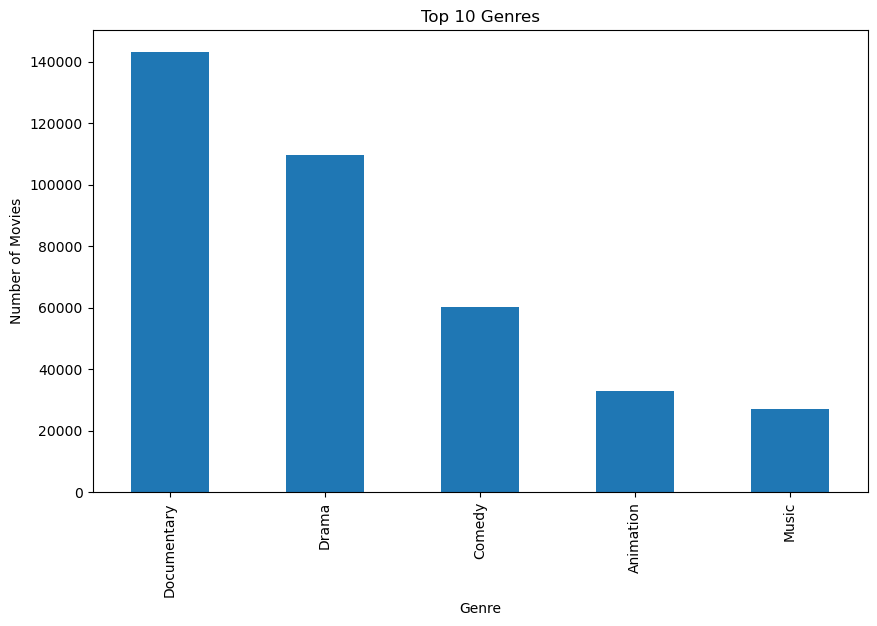

In [24]:
# plot the histogram of genres
plt.figure(figsize=(10, 6))
main_complete['genres'].value_counts().head().plot(kind='bar')
plt.title('Top 10 Genres')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.show()

# Clustering


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load dataset
main_complete = pd.read_csv('data/main_complete.csv')
main_complete.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,music_composer,imdb_rating,imdb_votes,poster_path,Netflix,Amazon,Hulu,Apple,HBO,sentiment
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,0.0,1.0,1.0,0.0,0.0,68.24
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,0.0,1.0,1.0,0.0,0.0,73.44
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,0.0,1.0,0.0,1.0,0.0,86.06
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,Alan Silvestri,6.6,19268.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg,0.0,1.0,0.0,0.0,0.0,79.34
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg,0.0,0.0,0.0,0.0,0.0,382.44


In [3]:
#see column vote_average in main dataset 

features = ['vote_average', 'vote_count', 'imdb_rating', 'imdb_votes']
var = features[2]

print('Max. number: ', max(main_complete[var]))
print('Min number: ', min(main_complete[var]))

#count how many nans are in the vote_average column
nulls = main_complete[var].isnull().sum()
print('Number of NaNs: ', nulls)

#count how many 0 are in the vote_average column
zero = (main_complete[var] == 0).sum()
print('Number of 0s: ', zero)

#count how many 10 are in the vote_average column
ten = (main_complete[var] == 10).sum()
print('Number of 10s: ',ten)

# count how many 11 are in the vote_average column
one = (main_complete[var] == 1).sum()
print('Number of 1s: ',one)

print(len(main_complete[var]))

print(nulls/len(main_complete)*100) #percentage of nans in the column

Max. number:  10.0
Min number:  1.0
Number of NaNs:  582264
Number of 0s:  0
Number of 10s:  122
Number of 1s:  41
1009839
57.65909219192367


In [4]:
#create a list of movies with imdb_rating equal to NaN
nan_imdb = main_complete[main_complete['imdb_rating'].isnull()]
len1 = len(nan_imdb['imdb_rating'])
print(len(nan_imdb['imdb_rating']))

nan_vote = main_complete[main_complete['vote_average'] == 0]
print(len(nan_vote['vote_average']))


582264
649478


In [5]:
#create a new df without the movies that have imdb_rating equal to NaN
main_complete2 = main_complete[main_complete['imdb_rating'].notnull()]
len2 = len(main_complete2)
print(len(main_complete)-len1)
print(len2)

427575
427575


In [6]:
#create a list of movies of main_complete2 with imdb_votes equal to NaN
nan_imdb_votes = main_complete2[main_complete2['imdb_votes'] == 0]
len3 = len(nan_imdb_votes)
print(len(nan_imdb_votes))

0


/var/folders/tf/4m3mvmrd1ddgcyk882fq_c140000gn/T/ipykernel_6811/2351582028.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['cluster'] = kmeans.fit_predict(scaled_features)


Davies-Bouldin Index: 0.5898396261837733


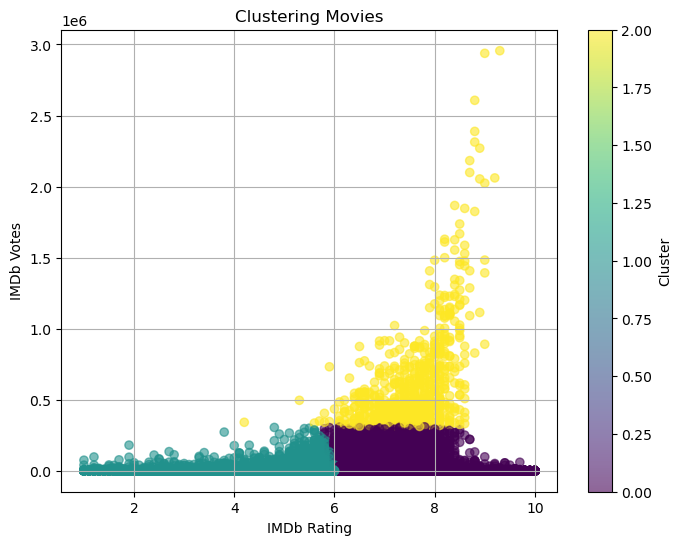

In [38]:
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Use the entire dataset (no missing values in columns)
sample_data = main_complete2

# Step 2: Select the features ('imdb_rating' and 'imdb_votes')
features = sample_data[['imdb_rating', 'imdb_votes']]

# Step 3: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
sample_data['cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Compute Davies-Bouldin Index
dbi_score = davies_bouldin_score(scaled_features, sample_data['cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

# Step 6: Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(sample_data['imdb_rating'], sample_data['imdb_votes'], 
                       c=sample_data['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Clustering Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('IMDb Votes')
plt.grid(True)
plt.show()


In [17]:
# convert to 0 all nan values in the column imdb_votes
main_complete['imdb_votes'] = main_complete['imdb_votes'].fillna(0)

# convert to 0 all nan values in the column imdb_rating
main_complete['imdb_rating'] = main_complete['imdb_rating'].fillna(0)


/var/folders/tf/4m3mvmrd1ddgcyk882fq_c140000gn/T/ipykernel_8108/2192489767.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['cluster'] = kmeans.fit_predict(scaled_features)
/var/folders/tf/4m3mvmrd1ddgcyk882fq_c140000gn/T/ipykernel_8108/2192489767.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unseen_titles['cluster'] = 3  # Assign a distinct cluster label for unseen titles


CSV with movie titles and clustering results saved successfully.


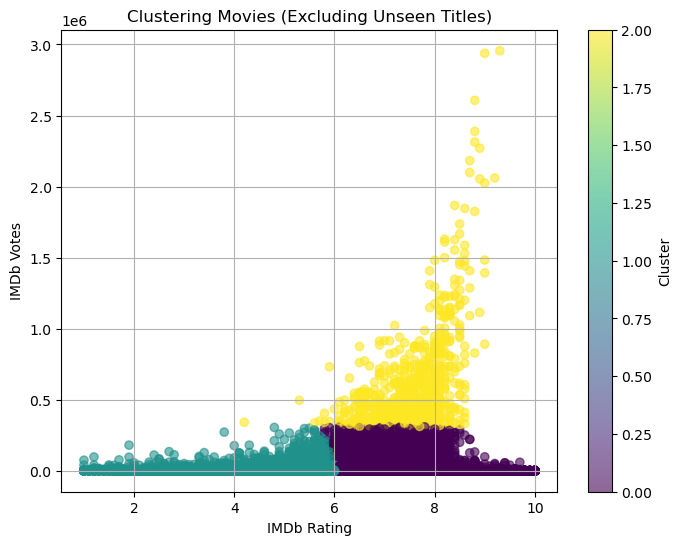

In [39]:
# Step 1: Use the entire dataset (no missing values in columns)
sample_data = main_complete.copy()

# Step 2: Select the features ('imdb_rating' and 'imdb_votes')
features = sample_data[['imdb_rating', 'imdb_votes']]

# Step 3: Separate "Unseen Titles" (movies with 0 votes and 0 ratings)
unseen_titles = sample_data[(sample_data['imdb_rating'] == 0) & (sample_data['imdb_votes'] == 0)]
cluster_data = sample_data[(sample_data['imdb_rating'] != 0) | (sample_data['imdb_votes'] != 0)]

# Step 4: Standardize the features for clustering
features_to_cluster = cluster_data[['imdb_rating', 'imdb_votes']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_cluster)

# Step 5: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['cluster'] = kmeans.fit_predict(scaled_features)

# Step 6: Assign "Unseen Titles" a new cluster label
unseen_titles['cluster'] = 3  # Assign a distinct cluster label for unseen titles

# Step 7: Combine all data
result_data = pd.concat([cluster_data, unseen_titles], axis=0)

# Step 8: Save results to CSV with only title and cluster
result_data[['title', 'cluster','imdb_rating','imdb_votes']].to_csv('movies_with_clusters.csv', index=False)
print("CSV with movie titles and clustering results saved successfully.")

# Step 9: Plot the results (excluding "Unseen Titles")
plt.figure(figsize=(8, 6))
scatter = plt.scatter(cluster_data['imdb_rating'], cluster_data['imdb_votes'], 
                       c=cluster_data['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Clustering Movies (Excluding Unseen Titles)')
plt.xlabel('IMDb Rating')
plt.ylabel('IMDb Votes')
plt.grid(True)
plt.show()

In [40]:
df_clusters = pd.read_csv('movies_with_clusters.csv')

# print len of each cluster
print(df_clusters['cluster'].value_counts())

print(df_clusters[800000:800020])



cluster
3    582264
0    255034
1    171854
2       687
Name: count, dtype: int64
                                 title  cluster  imdb_rating  imdb_votes
800000                 Agrippina - DPT        3          0.0         0.0
800001                The Spanish King        3          0.0         0.0
800002                  Cum As You Are        3          0.0         0.0
800003                           Racek        3          0.0         0.0
800004    when i leave this all behind        3          0.0         0.0
800005                 Slunce v kaluži        3          0.0         0.0
800006             The Perfect Machine        3          0.0         0.0
800007                   湊かなえサスペンス『望郷』        3          0.0         0.0
800008                      Still Free        3          0.0         0.0
800009            Taken to the Cleaner        3          0.0         0.0
800010           Byl jednou jeden drak        3          0.0         0.0
800011                 Sudden Istanbul    

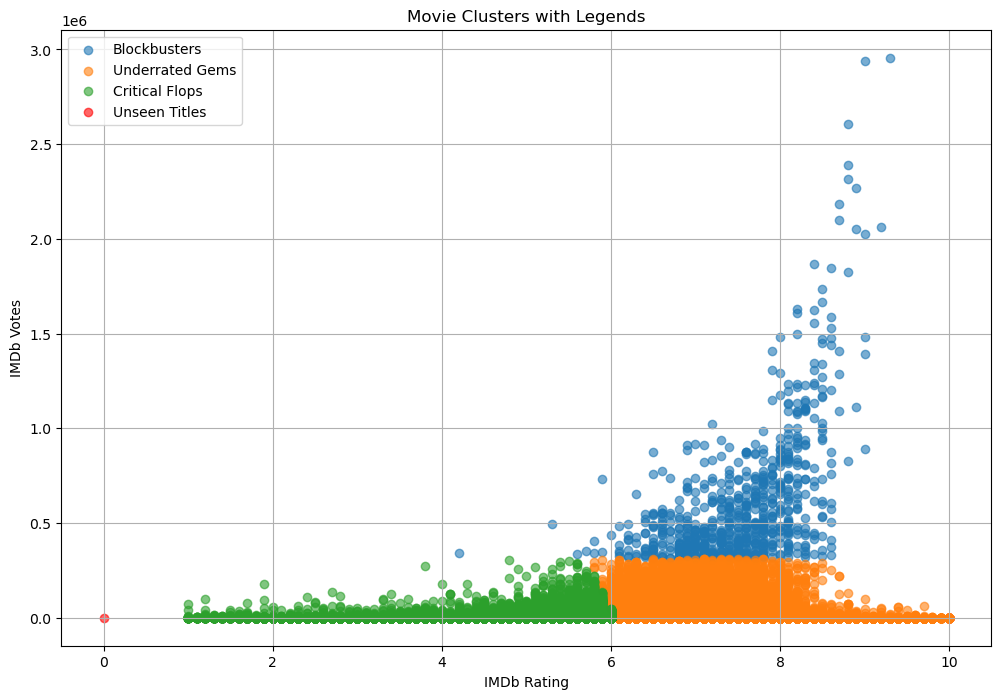

In [38]:
import matplotlib.pyplot as plt

# Define cluster titles
cluster_titles = {
    2: 'Blockbusters',
    0: 'Underrated Gems',
    1: 'Critical Flops',
    3: 'Unseen Titles'
}

# Separate clustered data and "Unseen Titles"
clustered_movies = cluster_data.copy()  # Movies used in k-means clustering
unseen_movies = unseen_titles.copy()    # Movies with 0 votes and 0 ratings

# Plot clustered movies with their respective clusters
plt.figure(figsize=(12, 8))

# Plot each cluster separately to create a custom legend
for cluster, title in cluster_titles.items():
    if cluster != 3:  # Exclude Unseen Titles for now
        cluster_subset = clustered_movies[clustered_movies['cluster'] == cluster]
        plt.scatter(cluster_subset['imdb_rating'], cluster_subset['imdb_votes'], 
                    label=title, alpha=0.6)

# Plot "Unseen Titles" as a single point
plt.scatter(0, 0, c='red', label=cluster_titles[3],  alpha=0.6)  # Add "Unseen Titles" to legend

# Add plot details
plt.title('Movie Clusters with Legends')
plt.xlabel('IMDb Rating')
plt.ylabel('IMDb Votes')
plt.legend(loc='upper left', frameon=True)  # Add legend with cluster names
plt.grid(True)

# Show the plot
plt.show()

Davies-Bouldin Index: 1.108076366053341


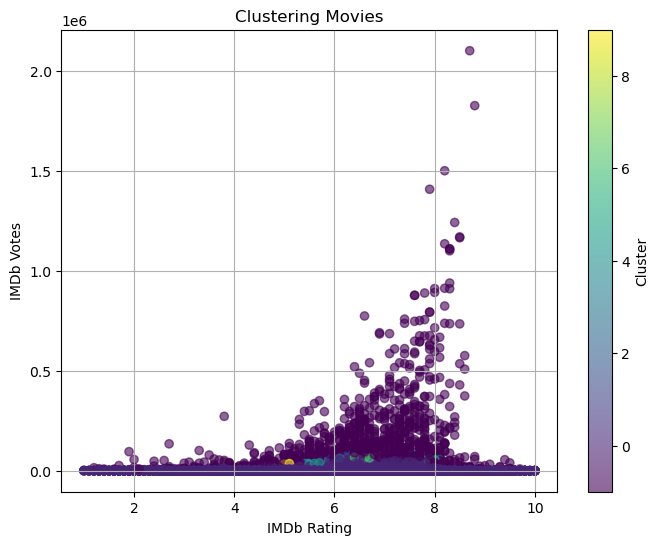

In [45]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import davies_bouldin_score


# Step 1: Use the entire dataset (no missing values in columns)
sample_data = main_complete2.sample(frac=0.2, random_state=42)

# Step 2: Select the features ('imdb_rating' and 'imdb_votes')
features = sample_data[['imdb_rating', 'imdb_votes']]

# Step 3: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply KMeans clustering
dbscan = DBSCAN(eps=0.1, min_samples=7)  # You can adjust `eps` and `min_samples` based on your data
sample_data['cluster'] = dbscan.fit_predict(scaled_features)

# Step 5: Compute Davies-Bouldin Index
dbi_score = davies_bouldin_score(scaled_features, sample_data['cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

# Step 6: Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(sample_data['imdb_rating'], sample_data['imdb_votes'], 
                       c=sample_data['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Clustering Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('IMDb Votes')
plt.grid(True)
plt.show()

Davies-Bouldin Index: 0.6244371081963161


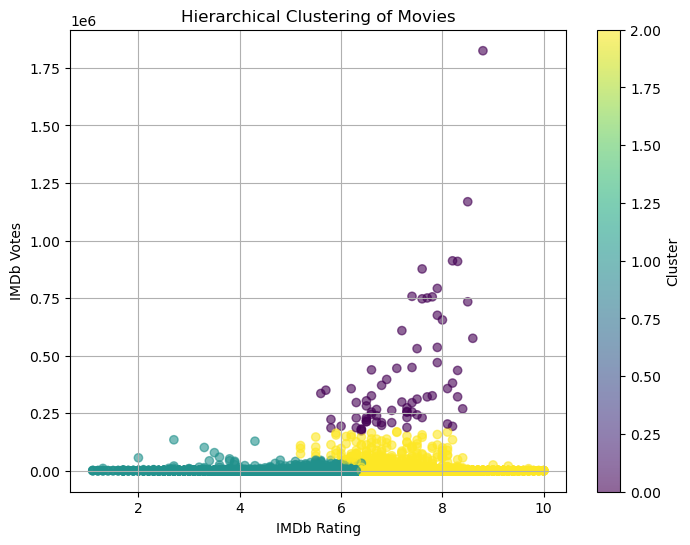

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import davies_bouldin_score


# Step 2: Take a smaller random sample (e.g., 5% of the data)
sample_data = main_complete2.sample(frac=0.05, random_state=42)

# Step 3: Select the features ('imdb_rating_filled' and 'imdb_votes')
features = sample_data[['imdb_rating', 'imdb_votes']]

# Step 4: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply Hierarchical Clustering using Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)  # You can adjust n_clusters
sample_data['cluster'] = agg_clust.fit_predict(scaled_features)

# Step 6: Compute Davies-Bouldin Index
dbi_score = davies_bouldin_score(scaled_features, sample_data['cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

# Step 7: Plot the results (scatter plot)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(sample_data['imdb_rating'], sample_data['imdb_votes'], c=sample_data['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Hierarchical Clustering of Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('IMDb Votes')
plt.grid(True)
plt.show()


MAL:

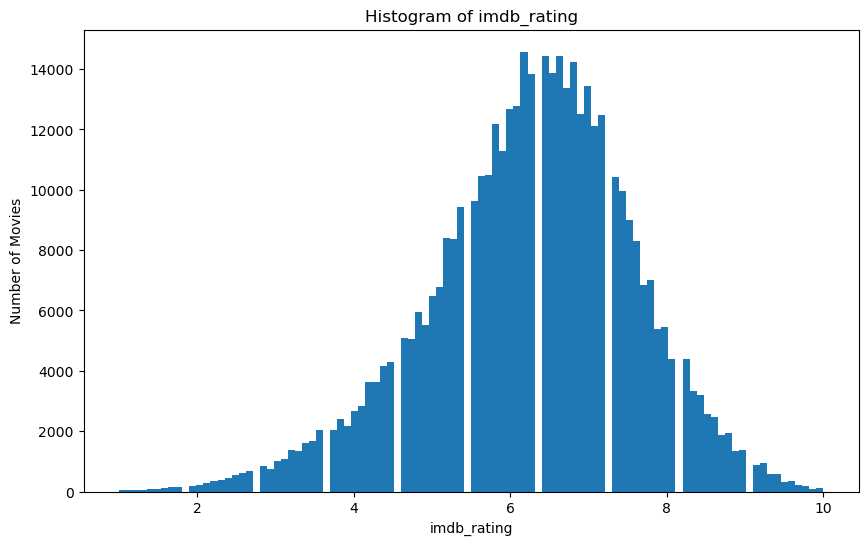

In [5]:
# plot histogram of vote_average and vote_count
var = features[2]
plt.figure(figsize=(10, 6))
main_complete[var].plot(kind='hist', bins=100)
plt.title('Histogram of ' + var)
plt.ylabel('Number of Movies')
plt.xlabel(var)
plt.show()


In [6]:
# create a new column with 0 if the column imdb_rating has a NaN and 1 if it has a value
main_complete['imdb_rating_missing'] = main_complete['imdb_rating'].isna().astype(int)

In [7]:
# convert to 0 all the NaN values in the column imdb_votes
main_complete['imdb_votes'] = main_complete['imdb_votes'].fillna(0)

In [8]:
# convert to 0 all the NaN values in the column imdb_count
main_complete['imdb_rating'] = main_complete['imdb_rating'].fillna(0)

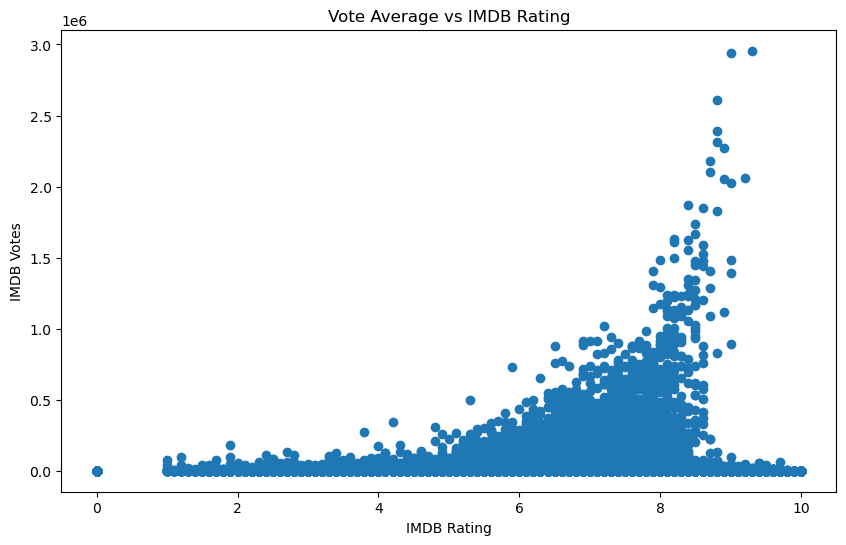

Correlation between vote_average and imdb_rating: 0.07853481309729893


In [9]:
# plot scatter plot of vote_average vs imdb_rating
plt.figure(figsize=(10, 6))
plt.scatter(main_complete['imdb_rating'], main_complete['imdb_votes'])
plt.title('Vote Average vs IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('IMDB Votes')
plt.show()

# compute correlation between vote_average and imdb_rating
correlation = main_complete['imdb_votes'].corr(main_complete['imdb_rating'])
print('Correlation between vote_average and imdb_rating:', correlation)


In [8]:
# see the 10 movies with higher imdb votes
# main_complete.sort_values('imdb_votes', ascending=False).head(10)


In [ ]:
# replace missing imdb_rating values with vote_average
# main_complete['imdb_rating'] = main_complete['imdb_rating'].fillna(main_complete['vote_average'])

In [ ]:
# delete the rows with NaNs in the vote_average column
# main_complete = main_complete.dropna(subset=['vote_average'])

I will work only with imdb_rating and imdb_vote, but we can add more variables after this

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:
features = main_complete[['imdb_rating', 'imdb_votes', 'imdb_rating_missing']]

print(features)

         imdb_rating  imdb_votes  imdb_rating_missing
0                7.4      8735.0                    0
1                7.5      7484.0                    0
2                6.7    112484.0                    0
3                6.6     19268.0                    0
4                8.2       284.0                    0
...              ...         ...                  ...
1009834          0.0         0.0                    1
1009835          0.0         0.0                    1
1009836          0.0         0.0                    1
1009837          0.0         0.0                    1
1009838          0.0         0.0                    1

[1009839 rows x 3 columns]


Davies-Bouldin Index: 0.4135341156638838


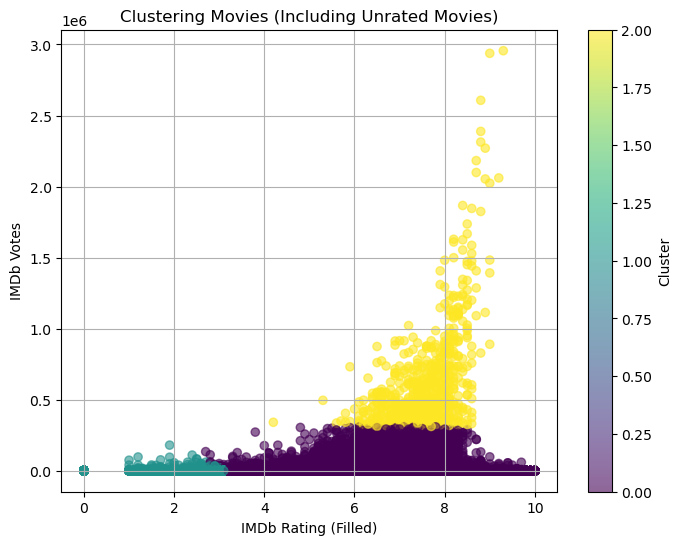

In [15]:
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fill missing IMDb ratings with 0 for clustering
main_complete['imdb_rating_filled'] = main_complete['imdb_rating'].fillna(0)

# Step 2: Take a random sample of 20% of the data
#sample_data = main_complete.sample(frac=0.6, random_state=42)
sample_data = main_complete
# Step 3: Select the features ('imdb_rating_filled' and 'imdb_votes')
features = sample_data[['imdb_rating_filled', 'imdb_votes']]

# Step 4: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
sample_data['cluster'] = kmeans.fit_predict(scaled_features)

# Step 6: Compute Davies-Bouldin Index
dbi_score = davies_bouldin_score(scaled_features, sample_data['cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

# Step 7: Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(sample_data['imdb_rating_filled'], sample_data['imdb_votes'], 
                       c=sample_data['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Clustering Movies (Including Unrated Movies)')
plt.xlabel('IMDb Rating (Filled)')
plt.ylabel('IMDb Votes')
plt.grid(True)
plt.show()


Davies-Bouldin Index: 1.104257929374312


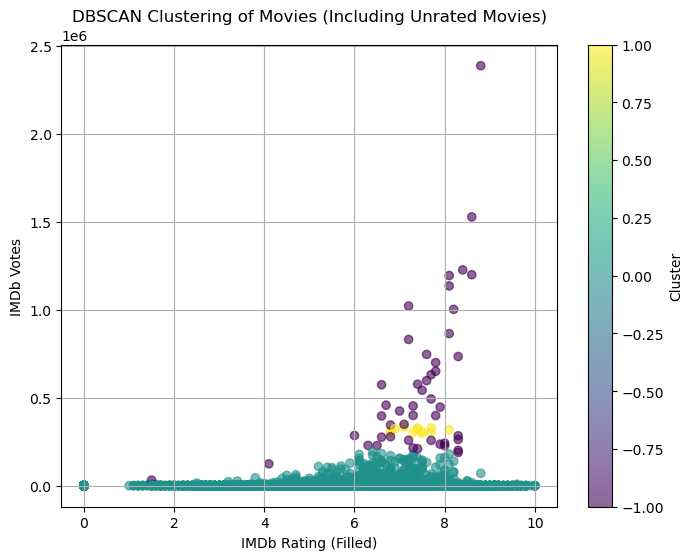

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fill missing IMDb ratings with 0 for clustering
main_complete['imdb_rating_filled'] = main_complete['imdb_rating'].fillna(0)

# Step 2: Take a random sample of 20% of the data to prevent kernel from dying
sample_data = main_complete.sample(frac=0.01, random_state=42)

# Step 3: Select the features ('imdb_rating_filled' and 'imdb_votes')
features = sample_data[['imdb_rating_filled', 'imdb_votes']]

# Step 4: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust `eps` and `min_samples` based on your data
sample_data['cluster'] = dbscan.fit_predict(scaled_features)


# Step 6: Compute Davies-Bouldin Index
dbi_score = davies_bouldin_score(scaled_features, sample_data['cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

# Step 7: Plot the results
plt.figure(figsize=(8, 6))

# Plot data points, color the points based on the cluster assigned
scatter = plt.scatter(sample_data['imdb_rating_filled'], sample_data['imdb_votes'], c=sample_data['cluster'], cmap='viridis', alpha=0.6)

# Add a colorbar
plt.colorbar(scatter, label='Cluster')

# Add title and labels
plt.title('DBSCAN Clustering of Movies (Including Unrated Movies)')
plt.xlabel('IMDb Rating (Filled)')
plt.ylabel('IMDb Votes')
plt.grid(True)

# Show the plot
plt.show()


Heriarchical Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fill missing IMDb ratings with 0 for clustering
main_complete['imdb_rating_filled'] = main_complete['imdb_rating'].fillna(0)

# Step 2: Take a smaller random sample (e.g., 5% of the data)
sample_data = main_complete.sample(frac=0.01, random_state=42)

# Step 3: Select the features ('imdb_rating_filled' and 'imdb_votes')
features = sample_data[['imdb_rating_filled', 'imdb_votes']]

# Step 4: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply Hierarchical Clustering using Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=4)  # You can adjust n_clusters
sample_data['cluster'] = agg_clust.fit_predict(scaled_features)

# Step 6: Compute Davies-Bouldin Index
dbi_score = davies_bouldin_score(scaled_features, sample_data['cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

# Step 7: Plot the results (scatter plot)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(sample_data['imdb_rating_filled'], sample_data['imdb_votes'], c=sample_data['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Hierarchical Clustering of Movies (Including Unrated Movies)')
plt.xlabel('IMDb Rating (Filled)')
plt.ylabel('IMDb Votes')
plt.grid(True)
plt.show()
